### Decision Tree

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
# Create a path
path = r'C:\Users\Asus-Pc\Desktop\CareerFoundry\Machine Learning with Python'

In [3]:
# Import [DATASET]_scaled.csv
df_scaled = pd.read_csv(os.path.join(path, '[DATASET]_scaled.csv'), index_col = False)
df_scaled

,Unnamed: 0,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,...,STOCKHOLM_temp_max,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,ROMA_temp_mean,DATE,MONTH
0,0,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,-1.119431,-1.136839,...,-0.639538,-0.257321,0.085361,-0.495396,-0.668215,-0.519743,-0.752237,-1.280450,19600101,1
1,1,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,-0.878727,-1.341204,...,-0.628550,-0.335759,-0.056680,-0.521727,-0.548046,-0.629054,-0.407141,-0.539569,19600102,1
2,2,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,-0.838610,-1.116403,...,-0.727444,-0.210258,0.298424,-0.574390,-0.067372,0.054135,-0.177078,-0.876333,19600103,1
3,3,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,-1.012452,-1.208367,...,-0.925231,-0.069069,0.458220,-0.442733,-0.998679,-0.164486,-0.838511,-0.775304,19600104,1
4,4,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,-0.918844,-1.116403,...,-0.705467,-0.037694,0.600262,-0.521727,-1.509396,-1.339569,-1.471186,-0.926848,19600105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,0.747959,0.779123,0.724314,0.628750,0.463536,0.695687,-0.005167,-0.009517,-0.002613,...,0.382364,1.295755,1.221694,1.281970,-0.007287,-0.000520,-0.004530,-0.000746,20221027,10
22946,22946,0.856604,1.223637,0.781585,0.367720,0.269258,0.376678,-0.005167,-0.009517,-0.002613,...,0.393353,1.358505,1.630063,1.084485,-0.007287,-0.000520,-0.004530,-0.000746,20221028,10
22947,22947,0.856604,1.039701,0.838855,0.083991,0.010220,0.077607,-0.005167,-0.009517,-0.002613,...,0.404341,1.405568,1.665574,1.123982,-0.007287,-0.000520,-0.004530,-0.000746,20221029,10
22948,22948,0.680055,0.809780,0.689952,0.265577,0.074979,0.346771,-0.005167,-0.009517,-0.002613,...,0.184577,0.668249,0.902100,0.452533,-0.007287,-0.000520,-0.004530,-0.000746,20221030,10


In [4]:
# Import weather dataset
df_weather = pd.read_csv(os.path.join(path, 'Weather_dataset.csv'), index_col = False)
df_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Drop columns regarding Roma, Tours and Gdansk from scaled dataset

df_reduced = df_scaled.drop(columns = ['Unnamed: 0','GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'TOURS_temp_mean', 'TOURS_temp_min',
                            'TOURS_temp_max', 'ROMA_temp_mean'])

In [6]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_reduced.drop(['DATE', 'MONTH'], axis=1)
y = df_weather.drop(['DATE'], axis=1)

In [7]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [8]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


[Text(0.3649957780824825, 0.9833333333333333, 'x[26] <= 0.469\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.08350273346427438, 0.95, 'x[29] <= -0.216\ngini = 0.113\nsamples = 11198\nvalue = [[10414, 784]\n[9210, 1988]\n[9694, 1504]\n[11072, 126]\n[10985, 213]\n[10433, 765]\n[11007, 191]\n[10084, 1114]\n[11198, 0]\n[8131, 3067]\n[10689, 509]\n[10850, 348]\n[11198, 0]\n[10843, 355]\n[10998, 200]]'),
 Text(0.023095157081301082, 0.9166666666666666, 'x[5] <= 0.053\ngini = 0.032\nsamples = 7613\nvalue = [[7477, 136]\n[6889, 724]\n[7224, 389]\n[7594, 19]\n[7557, 56]\n[7563, 50]\n[7565, 48]\n[7375, 238]\n[7613, 0]\n[7613, 0]\n[7441, 172]\n[7574, 39]\n[7613, 0]\n[7579, 34]\n[7597, 16]]'),
 Text(0.00740503713417303, 0.8833333333333333, 'x[23] <= 0.233\ngini = 0.005\nsamples

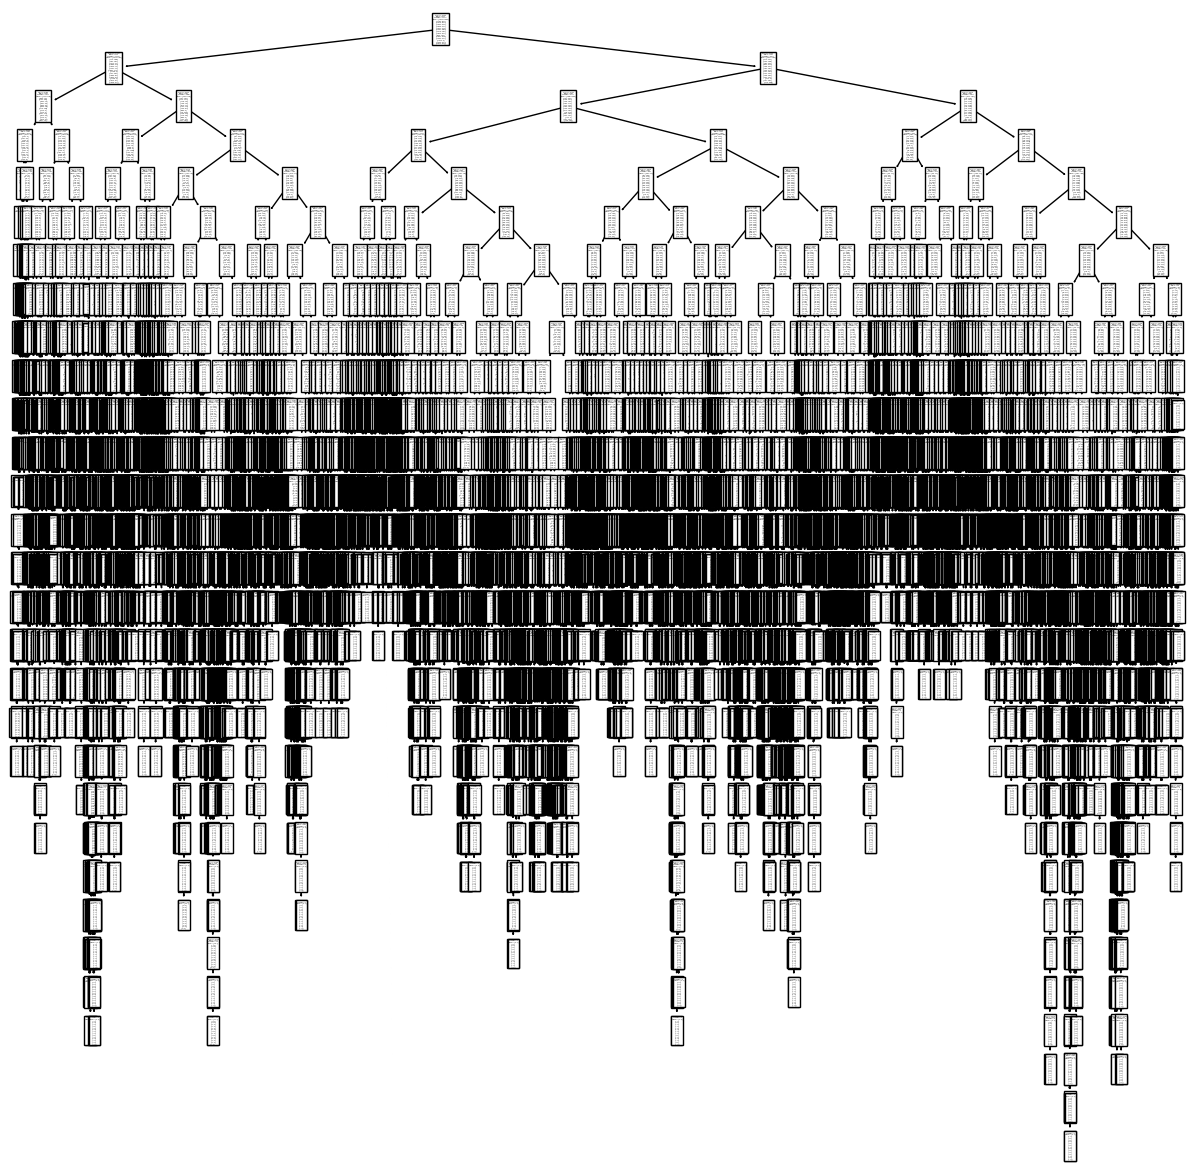

In [10]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

### This decision tree is way too big and cluttered, so that it is impossible to distinguish between the different branches. It needs to be pruned.

In [17]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.4606668480011658


#### The accuracy of the training data is of 46% 

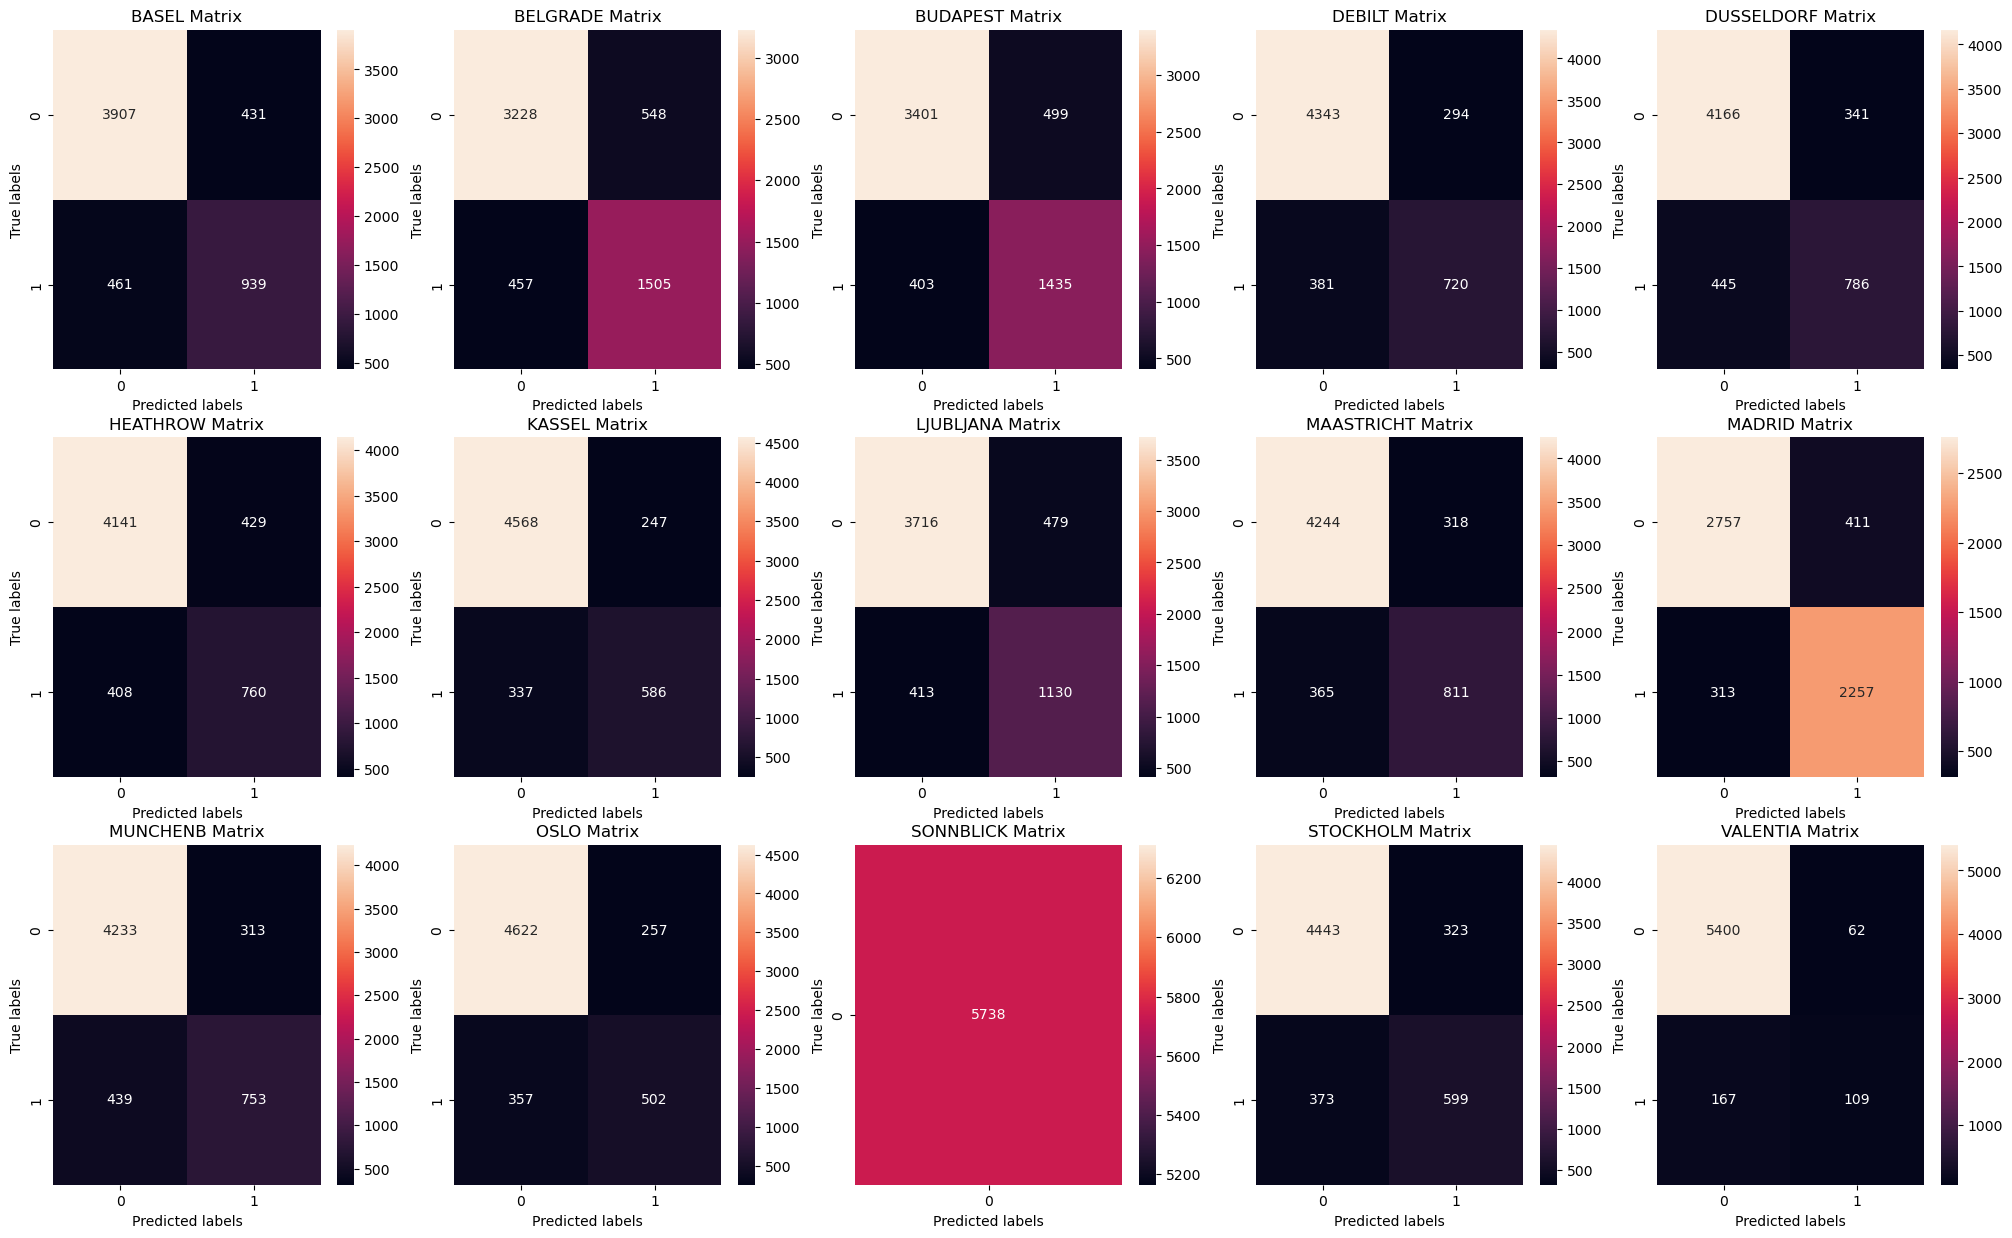

In [18]:
#Confusion matrix based on the last "k" in the sequence (training data)
locations = list({x.split("_")[0] for x in df_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [19]:
#What is the testing accuracy score? Using the cross validation method
y_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.46514464970372954


array([[[3878,  460],
        [ 436,  964]],

       [[3210,  566],
        [ 554, 1408]],

       [[3419,  481],
        [ 495, 1343]],

       [[4290,  347],
        [ 399,  702]],

       [[4075,  432],
        [ 445,  786]],

       [[4089,  481],
        [ 403,  765]],

       [[4480,  335],
        [ 349,  574]],

       [[3686,  509],
        [ 455, 1088]],

       [[4183,  379],
        [ 348,  828]],

       [[2803,  365],
        [ 427, 2143]],

       [[4099,  447],
        [ 445,  747]],

       [[4526,  353],
        [ 311,  548]],

       [[5738,    0],
        [   0,    0]],

       [[4479,  287],
        [ 359,  613]],

       [[5296,  166],
        [ 178,   98]]], dtype=int64)

#### The accuracy of the testing data is of 47% 

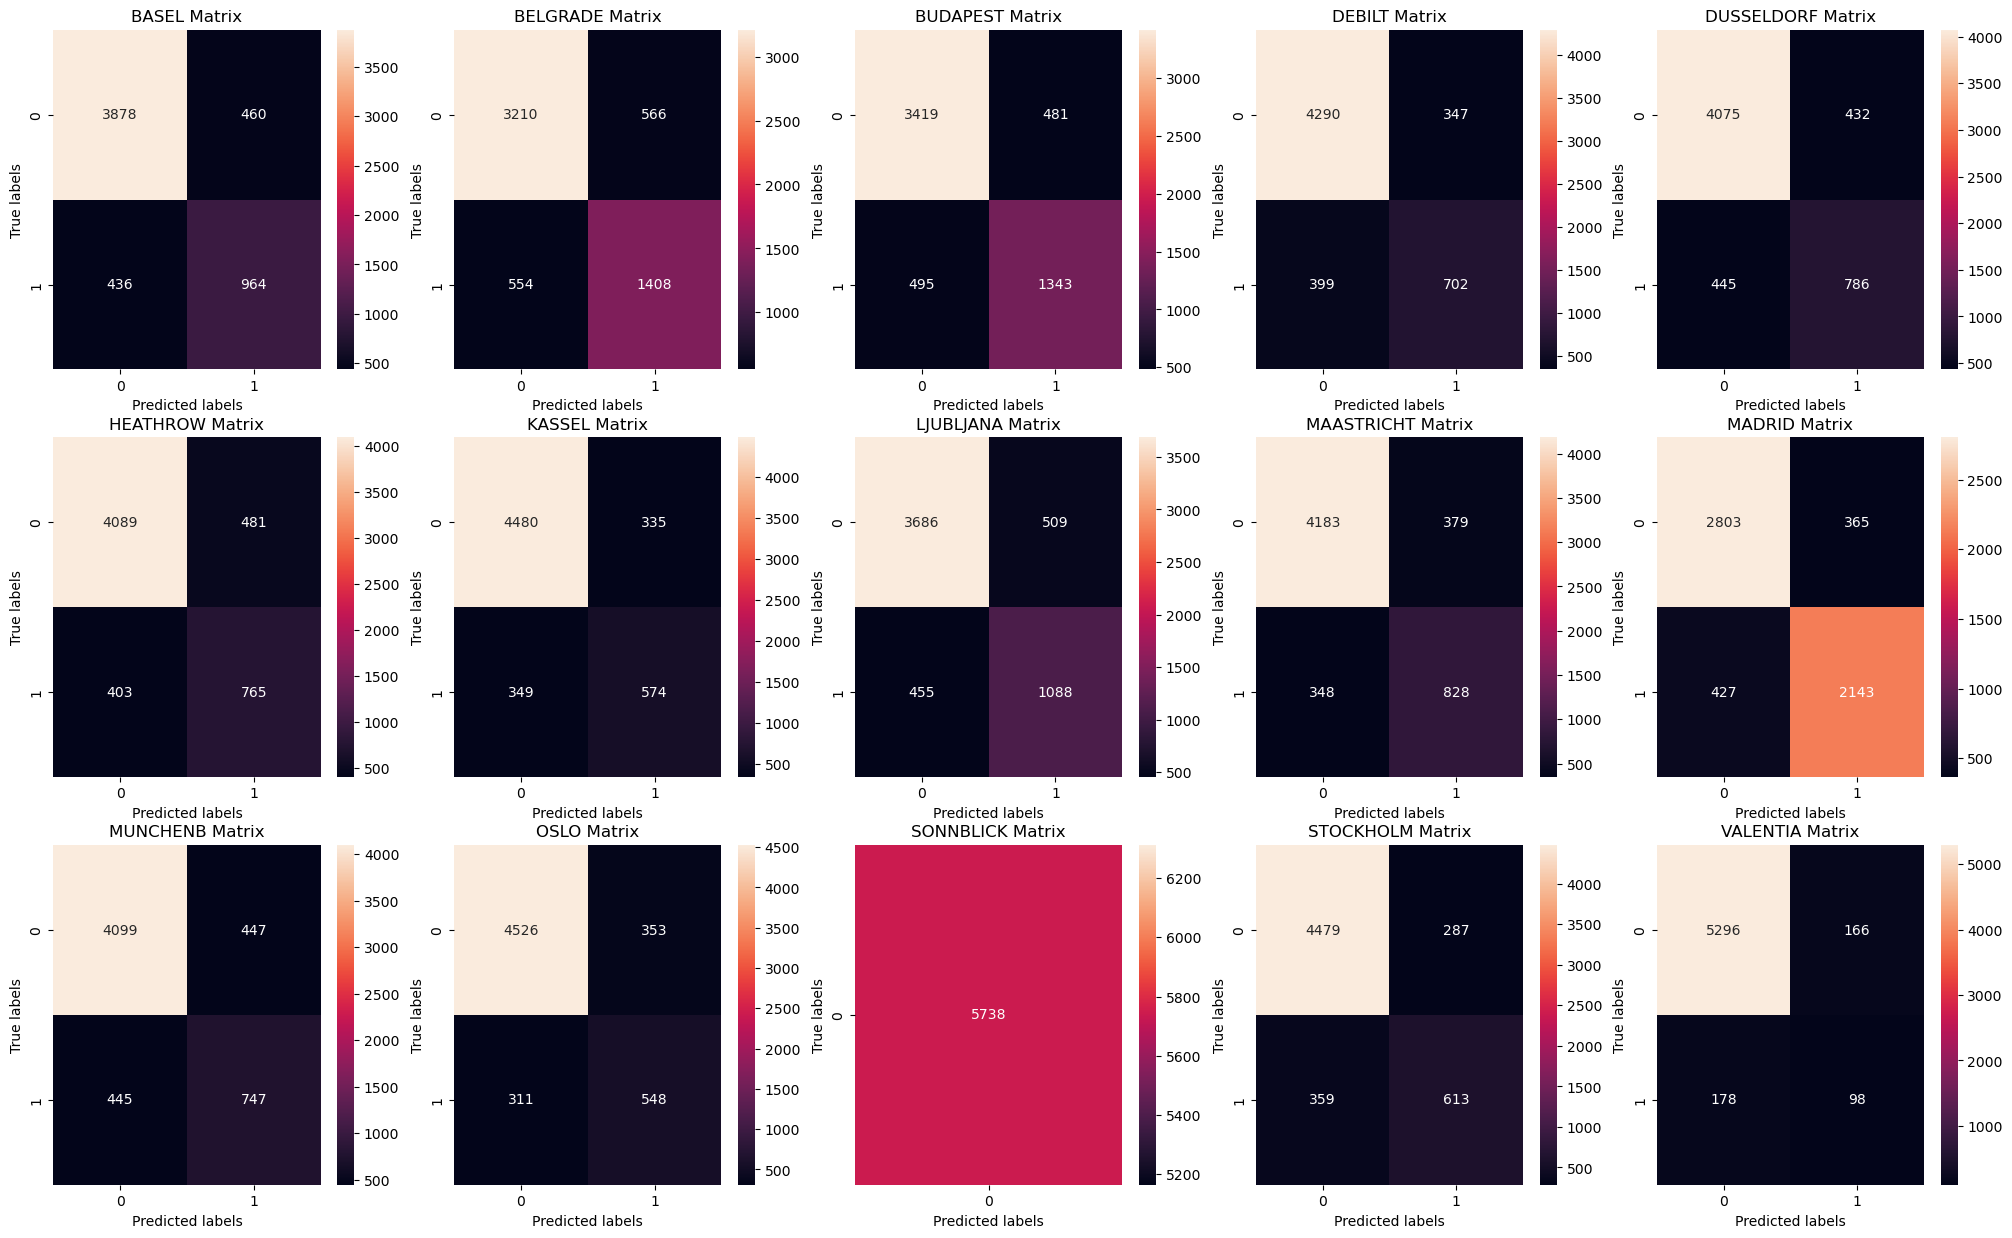

In [20]:
#Confusion matrix based on the last "k" in the sequence (test data)
locations = list({x.split("_")[0] for x in df_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### There aren't relevant differences between the matrixes generated with the training and the testing data.